In [1]:
### 4. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate datasets.
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100

def sigmoid (x): 				# Returns sigmoid value for the input parameter
    return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):		# Returns derivative of sigmoid function
    return x * (1 - x)

epoch=5000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    n= 0
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

wout += hlayer_act.T.dot(d_output) *lr
wh += X.T.dot(d_hiddenlayer) *lr
n+=1
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87879671]
 [0.8693699 ]
 [0.88053036]]


### 5. Demonstrate Genetic algorithm by taking a suitable data for any simple application.

In [2]:
import random
import numpy as np

# initialize the population of bit vectors
def init_population(pop_size, genome_size): 
    return [random.choices(range(2), k=genome_size) for _ in range(pop_size)]

# an individual's fitness is the number of 1s
def fitness(individual):
    return sum(individual)

# tournament selection
def selection(population, fitnesses):
    tournament = random.sample(range(len(population)), k=3)
    tournament_fitnesses = [fitnesses[i] for i in tournament]
    winner_index = tournament[np.argmax(tournament_fitnesses)]
    return population[winner_index]

# single-point crossover
def crossover(parent1, parent2):
    xo_point = random.randint(1, len(parent1) - 1)
    return ([parent1[:xo_point] + parent2[xo_point:],
             parent2[:xo_point] + parent1[xo_point:]])

# bitwise mutation with probability 0.1
def mutation(individual):
    for i in range(len(individual)):
        if random.random() < 0.1:
            individual = individual[:i] + [1-individual[i]] + individual[i + 1:]
    return individual

pop_size, genome_size = 6, 5
population = init_population(pop_size, genome_size)  # generation 0

for gen in range(10):
    fitnesses = [fitness(individual) for individual in population]
    print('Generation ', gen, '\n', list(zip(population, fitnesses)))
    nextgen_population = []
    for i in range(int(pop_size / 2)):
        parent1 = selection(population, fitnesses)  # select first parent
        parent2 = selection(population, fitnesses)  # select second parent
        offspring1, offspring2 = crossover(parent1, parent2)  # perform crossover between both parents
        nextgen_population += [mutation(offspring1), mutation(offspring2)]  # mutate offspring
    population = nextgen_population

Generation  0 
 [([0, 0, 0, 1, 0], 1), ([1, 0, 0, 0, 1], 2), ([1, 1, 1, 0, 0], 3), ([1, 1, 1, 1, 0], 4), ([1, 1, 0, 0, 0], 2), ([0, 1, 1, 1, 1], 4)]
Generation  1 
 [([1, 1, 1, 1, 0], 4), ([1, 1, 1, 1, 1], 5), ([0, 1, 1, 1, 1], 4), ([0, 1, 1, 1, 1], 4), ([1, 1, 1, 1, 0], 4), ([1, 1, 1, 0, 0], 3)]
Generation  2 
 [([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 0, 0, 1, 0], 2), ([1, 1, 1, 1, 1], 5), ([0, 1, 1, 1, 1], 4), ([0, 1, 0, 1, 1], 3)]
Generation  3 
 [([1, 1, 1, 1, 1], 5), ([1, 0, 1, 0, 1], 3), ([1, 1, 1, 0, 1], 4), ([0, 0, 1, 0, 1], 2), ([1, 1, 1, 0, 1], 4), ([1, 1, 0, 1, 1], 4)]
Generation  4 
 [([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 0], 4), ([0, 1, 1, 1, 1], 4), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), ([0, 1, 1, 0, 1], 3)]
Generation  5 
 [([1, 1, 1, 0, 1], 4), ([0, 1, 1, 1, 1], 4), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5)]
Generation  6 
 [([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 1, 1], 5), (

### 6. Demonstrate Q learning algorithm with suitable assumption for a problem statement. (honey bee)

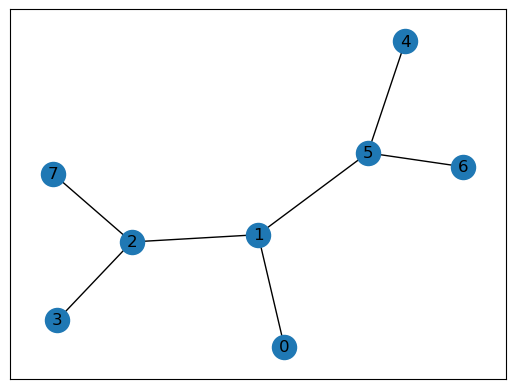

Trained Q matrix:
[[  0.          63.99843191   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19874553   0.          79.99803989   0.           0.
   51.13884488   0.           0.        ]
 [  0.          63.99843191   0.          63.99843191   0.
    0.           0.          99.99754986]
 [  0.           0.          79.99803989   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19678542   0.           0.        ]
 [  0.          63.99598177   0.           0.          40.94516806
    0.          40.95742833   0.        ]
 [  0.           0.           0.           0.           0.
   51.19678542   0.           0.        ]
 [  0.           0.          79.99803989   0.           0.
    0.           0.         100.        ]]
Most efficent path:
[0, 1, 2, 7]


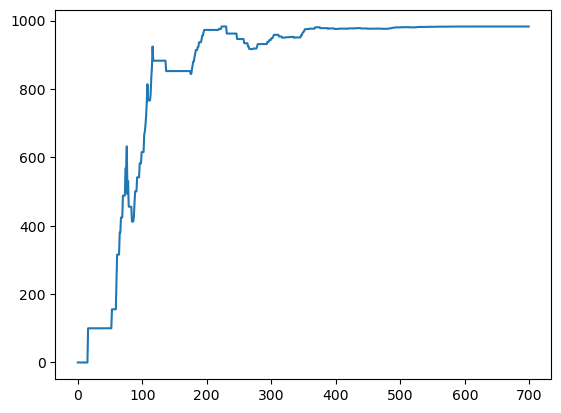

In [16]:
import numpy as np
import pylab as plt
import networkx as nx

points_list = [(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7)]
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

R = np.matrix(np.ones(shape=(8,8))) # MATRIX_SIZE = 8
R *= -1

for point in points_list:
    if point[1] == goal:       # assign zeroes to paths and 100 to goal-reaching point
        R[point] = 100
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([8,8]))
gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row>=0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def update(current_state,action,gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action,max_index]
    
    Q[current_state,action] = R[current_state,action] + gamma * max_value
    #print("max_value",Q[current_state,action])
    
    if(np.max(Q)>0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)

available_act = available_actions(initial_state)
action = sample_next_action(available_act)
update(initial_state,action,gamma)

# training 
scores = []
for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)  # print("Score:",str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# testing 
current_state = 0 
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,]== np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficent path:")
print(steps)
plt.plot(scores)
plt.show()

### 6. Demonstrate Q learning algorithm with suitable assumption for a problem statement. (Maze)
![img](simple_maze_problem.png)

In [3]:
import pandas as pd
import numpy as np

def get_possible_next_states(state, F, states_count):
    """
    For a given cell state 'state', the function uses the feasibility matrix F to
    determine which states can be reached, and returns those states as a list. For example, 
    if state = 5, the return list is [0, 6, 10] for given maze.
    
    Parameters
    ----------
    state: int
        (Zero-based) index for representing state for which all possible states are required
        
    F: ndarray
        Feasibility matrix
        
    states_count: int
        Total number of states in the maze
        
    Returns
    -------
    Out: list
        List of all possible states
        
    """
    
    possible_next_states = []
    for i in range(states_count):
        if F[state, i] == 1: 
            possible_next_states.append(i)
    
    return possible_next_states


def get_random_next_state(state, F, states_count):
    """
    For a given state 'state', all possible next states are determined, and then 
    one of those states is randomly selected. For example, if state = 5, then 
    candidates are [0, 6, 10] for given maze. The call to np.randomint() 
    returns a random value from 0 to 2 considering index of random next state.

    Parameters
    ----------
    state: int
        (Zero-based) index for representing state for which all possible states are required
        
    F: ndarray
        Feasibility matrix
        
    states_count: int
        Total number of states in the maze
    
    """
    
    possible_next_states = get_possible_next_states(state, F, states_count)
    next_state = possible_next_states[np.random.randint(0, len(possible_next_states))]
    
    return next_state

F = np.loadtxt("feasibility_matrix.csv", dtype="int", delimiter=',')
R = np.loadtxt("reward_matrix.csv", dtype="float", delimiter=',')

# Initializes quality matrix, denoted by Q, with all zeros
Q = np.zeros(shape=[15,15], dtype=np.float32)
display(pd.DataFrame(Q, dtype=float).style.format(precision=2)) 
# print(pd.DataFrame(Q, dtype=float).round(2))

def train(F, R, Q, gamma, lr, goal_state, states_count, episodes):
    """
    Computes the Q-matrix using Bellman equation, which is an extension of 
    standard Q function, that considers trade-off between exploitation and exploration.
    
    Parameters
    -----------
    F: Feasibility matrix
    R: Reward matrix
    Q: Q matrix
    gamma: Discount factor
    lr: learning rate through which trade-off between exploitation and exploration is expressed.
    goal_state: The goal state the agent should reach
    states_count: Total number of states in the maze
    episodes: Total number of episodes during traning
    
    """
    
    for i in range(0, episodes):
        # Selects a random start state
        current_state = np.random.randint(0, states_count)

        # Continues till goal state is reached
        while(True):
            # Selects a random next state from the current state
            next_state = get_random_next_state(current_state, F, states_count)
            
            # Gets all possible states from that next state
            possible_next_next_states = get_possible_next_states(next_state, F, states_count)

            # Compares the Q value between two possible next states
            max_Q = -9999.99
            for j in range(len(possible_next_next_states)):
                next_next_state = possible_next_next_states[j]
                q = Q[next_state, next_next_state]
                if q > max_Q:
                    max_Q = q
            
            # Updates the Q value using Bellman equation [refer maze image caption]
            Q[current_state][next_state] = \
                ((1 - lr) * Q[current_state][next_state]) + (lr * (R[current_state][next_state] 
                                                                   + (gamma * max_Q)))

            # Changes state by considering next state as current state and 
            # the training continues till goal state is reached
            current_state = next_state
            
            if current_state == goal_state:
                break
                
# Sets hyperparameters
gamma = 0.5   # discount factor
lr = 0.5      # learning_rate
goal_state = 14
states_count = 15
episodes = 1000
np.random.seed(42)

train(F, R, Q, gamma, lr, goal_state, states_count, episodes)

# Prints Q matrix generated out of training
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))  # print(pd.DataFrame(Q, dtype=float).round(2))

# The function walk() 

def print_shortest_path(start_state, goal_state, Q):
    """
    Finds shortest path in printable form
    
    Parameters
    ----------
    start_state: int
        Index of the starting state
        
    goal_state: int
        Index of the goal state
        
    Q: ndarray
        Learned Q matrix
    
    """
    
    current_state = start_state
    print(str(current_state) + "->", end="")
    
    # Loops till goal is reached and keeps on tracing the path
    while current_state != goal_state:
        # Chooses the best state from possible states and keep on printing
        next_state = np.argmax(Q[current_state])
        print(str(next_state) + "->", end="")
        
        # Considers next state as current state and continiues till goal is reached
        current_state = next_state
    
    print("Goal Reached.\n")
    
# Performs few tests for agent to get the shortest path
start_state = 8
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 13
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 6
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 1
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.62,0.00,2.50,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
5,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.16,0.00,0.00
8,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00


Best path to reach goal from state 8 to goal state 14
8->3->4->9->14->Goal Reached.

Best path to reach goal from state 13 to goal state 14
13->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 6 to goal state 14
6->5->10->11->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 1 to goal state 14
1->0->5->10->11->12->7->8->3->4->9->14->Goal Reached.



In [17]:
import pandas as pd
import numpy as np
def get_possible_next_states(state, F, states_count):
    possible_next_states = []
    for i in range(states_count):
        if F[state, i] == 1: 
            possible_next_states.append(i)
    return possible_next_states

def get_random_next_state(state, F, states_count):
    possible_next_states = get_possible_next_states(state, F, states_count)
    next_state = possible_next_states[np.random.randint(0, len(possible_next_states))]
    return next_state

F = np.loadtxt("feasibility_matrix.csv", dtype="int", delimiter=',')
R = np.loadtxt("reward_matrix.csv", dtype="float", delimiter=',')

# Initializes quality matrix, denoted by Q, with all zeros
Q = np.zeros(shape=[15,15], dtype=np.float32)
display(pd.DataFrame(Q, dtype=float).style.format(precision=2)) # print(pd.DataFrame(Q, dtype=float).round(2))

def train(F, R, Q, gamma, lr, goal_state, states_count, episodes):
    for i in range(0, episodes):
        current_state = np.random.randint(0, states_count)
        while(True):
            next_state = get_random_next_state(current_state, F, states_count)
            possible_next_next_states = get_possible_next_states(next_state, F, states_count)
            max_Q = -9999.99
            for j in range(len(possible_next_next_states)):
                next_next_state = possible_next_next_states[j]
                q = Q[next_state, next_next_state]
                if q > max_Q:
                    max_Q = q
            Q[current_state][next_state] = \
                ((1 - lr) * Q[current_state][next_state]) + (lr * (R[current_state][next_state] 
                                                                   + (gamma * max_Q)))
            current_state = next_state
            if current_state == goal_state:
                break
                
# Sets hyperparameters
gamma = 0.5   # discount factor
lr = 0.5      # learning_rate
goal_state = 14
states_count = 15
episodes = 1000
np.random.seed(42)

train(F, R, Q, gamma, lr, goal_state, states_count, episodes)

# Prints Q matrix generated out of training
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))  # print(pd.DataFrame(Q, dtype=float).round(2))

def print_shortest_path(start_state, goal_state, Q):
    current_state = start_state
    print(str(current_state) + "->", end="")
    while current_state != goal_state:
        next_state = np.argmax(Q[current_state])
        print(str(next_state) + "->", end="")
        current_state = next_state
    print("Goal Reached.\n")
    
# Performs few tests for agent to get the shortest path
start_state = 8
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 13
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 6
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 1
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.62,0.00,2.50,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
5,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.16,0.00,0.00
8,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00


Best path to reach goal from state 8 to goal state 14
8->3->4->9->14->Goal Reached.

Best path to reach goal from state 13 to goal state 14
13->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 6 to goal state 14
6->5->10->11->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 1 to goal state 14
1->0->5->10->11->12->7->8->3->4->9->14->Goal Reached.

